In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml_projects/Bank_term_deposit/bank-fullcsv.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In total from the dataset has 45211 rows and 17 columns

In [ ]:
# Get basic statistics for numerical variables
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45106.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.029952      2.763841   
std       10.618762    3044.765829      8.322476    257.319305      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

**Data Preprocessing**

In [ ]:
# Get the number of unique values for each categorical variable
print(df.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1571
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
df.dtypes


age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
Target        object
dtype: object

In [ ]:
# identifying the null values in the data.
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     105
campaign       0
pdays          0
previous       0
poutcome       0
Target         0
dtype: int64

The duration column has 105 null values and we can drop those rows as we donot loose much data

In [ ]:
# duration column has 105 null values, so deciding to drop them.
df.dropna(inplace=True)

In [ ]:
# verifying the data, after dropping the null values.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Verifying after dropping null values, we can see that there are no null values

**Exploratory Data Analysis**

<ipython-input-408-4bb4f4cfec11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


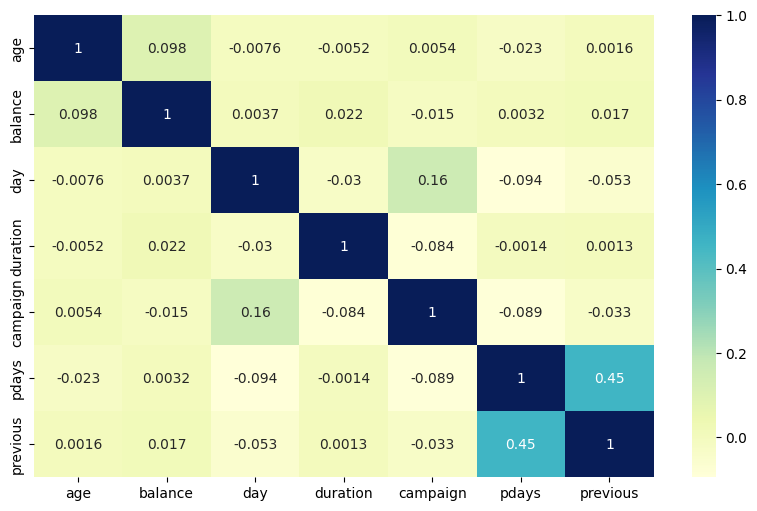

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

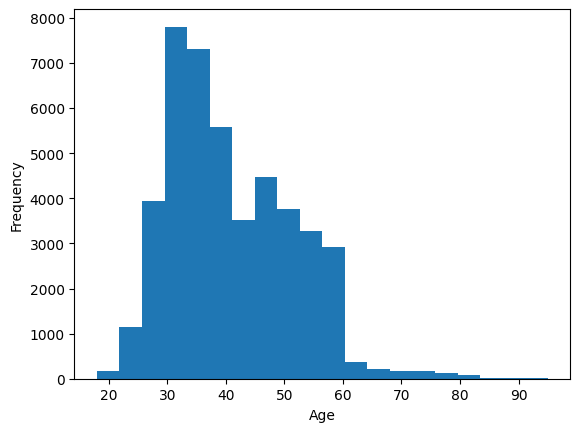

In [ ]:
# Plot a histogram of the age variable
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the graph above we can observe that most of the clients of the bank are in age range between 30 to 40 years.


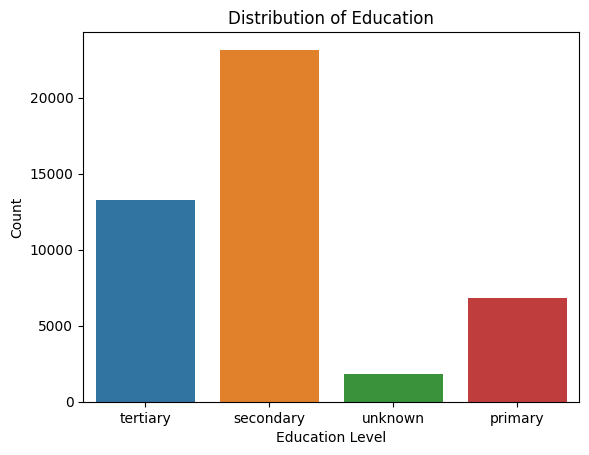

In [ ]:
sns.countplot(x="education", data=df)
plt.title("Distribution of Education")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Most of the clients of the bank have completed their secondary education

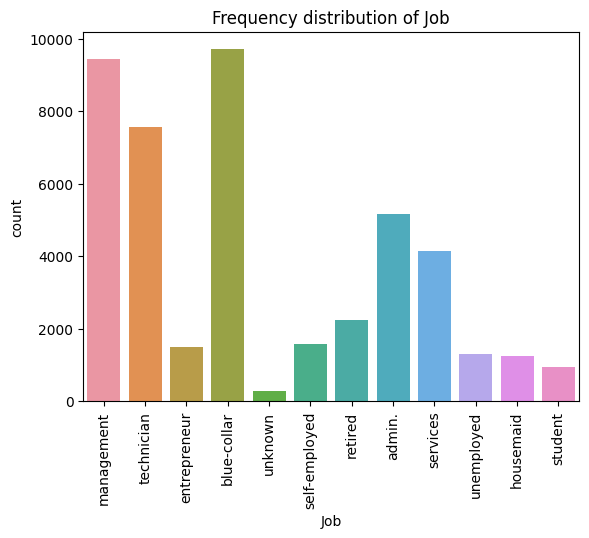

In [ ]:
# create a bar plot
sns.countplot(x='job', data=df)

# set the x-axis label and title
plt.xlabel('Job')
plt.title('Frequency distribution of Job')

# rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# display the plot
plt.show()

From the graph above we can see that clients holding blue-collar jobs are the highest and next comes management and then technician

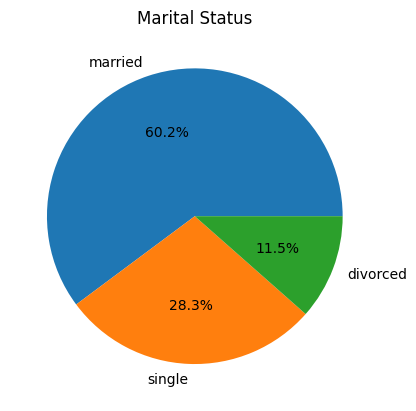

In [ ]:
# create a pie chart
counts = df['marital'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# set the title
plt.title('Marital Status')

# display the plot
plt.show()

Above 60% of the clients are married, 28.3% are single and 11.5% are devorced

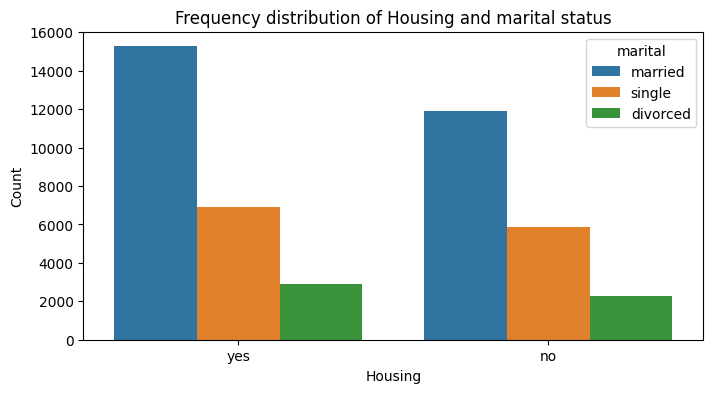

In [ ]:
# marital status and housing loans
plt.figure(figsize=(8, 4))
# create a stacked bar chart
sns.countplot(x='housing', hue='marital', data=df)

# set the x-axis and y-axis labels and title
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Frequency distribution of Housing and marital status')

# display the plot
plt.show()

In the above graph we have plotted clients who have taken housing loan and the frequency of their marital status. We can observe that married clients prefer more to take housing loans and if there any schemes related to housing loans or are family related they can be their potential leads.

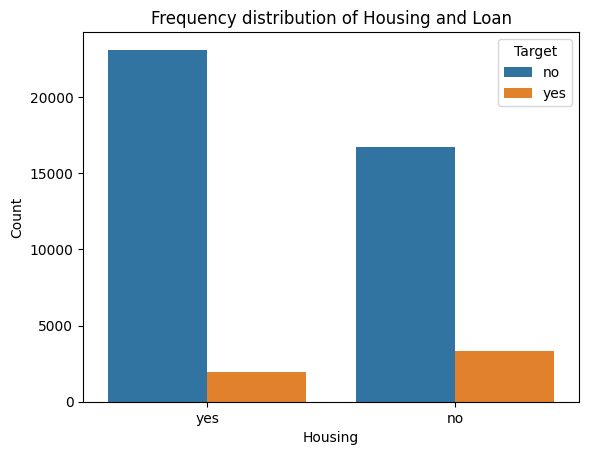

In [ ]:
# create a stacked bar chart
sns.countplot(x='housing', hue='Target', data=df)

# set the x-axis and y-axis labels and title
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Frequency distribution of Housing and Loan')

# display the plot
plt.show()

The above graph represents a count of clients with/without housing loans and if they are a target or not. We can observe that those people who have already taken housing loan will most probably be taking the scheme or terms and they are the banks postential targets.

Text(0.5, 1.0, 'Monthly Distribution')

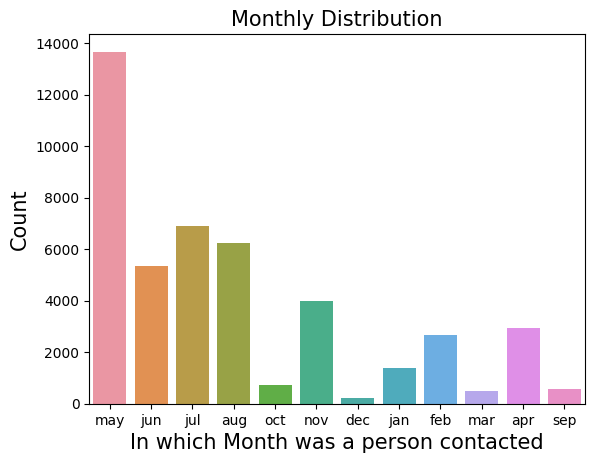

In [ ]:
# Month
#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = df)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

The above graph infers that most of the clients are contacted in the month of may. We can recommend that the bank should increase the clients contaced in every month as more the number of contacts the more chances of finding potential targets.

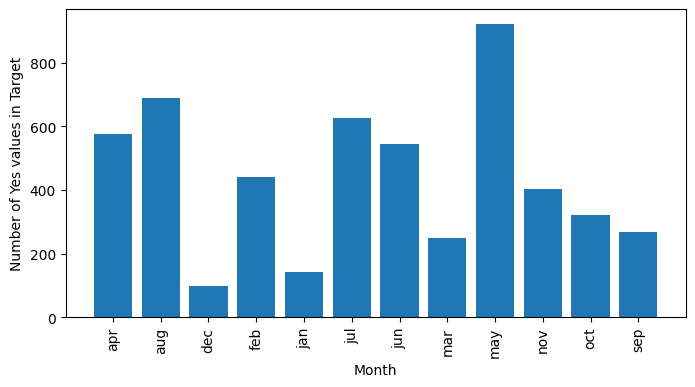

In [ ]:
# total targets in different months
df_yes = df[df["Target"] == "yes"]
grouped_data = df_yes.groupby("month")["Target"].count()
plt.figure(figsize=(8, 4))
# Create a bar chart to display the results
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Yes values in Target")
plt.show()

If we observe the above 2 graphs we can see that in the month of may there have been more contact with the clients and hence the higher number of clients acepting the proposal or the schems. This shows that the more contacts with the clients the more chances of getting higher target acceptance.

Text(0.5, 1.0, 'Poutcome distribution')

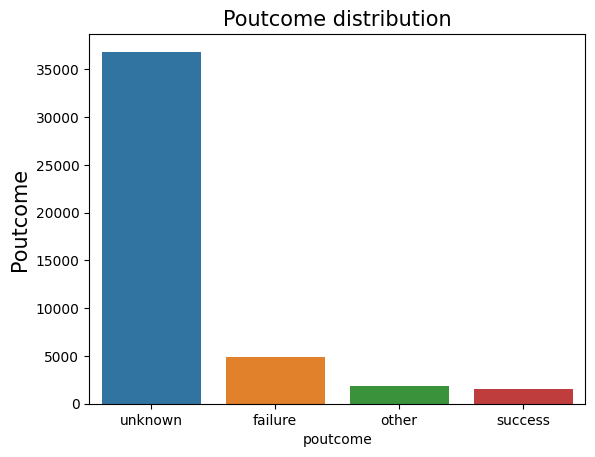

In [ ]:
# poutcome:
sns.countplot(x = 'poutcome', data = df, orient = 'v')
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)

Poutcome stands for the outcome of the previous campaign, can observe that the data is not clearly available and there should be more focus on gathering the correct data as this will result in greater analical results. 

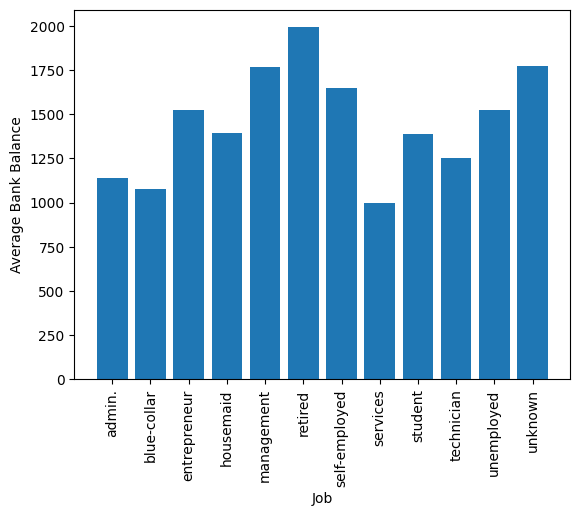

In [ ]:
# job and average bank balance
# Group data by job and calculate mean bank balance
grouped_data = df.groupby("job")["balance"].mean()

# Create a bar chart to display the results
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel("Job")
plt.ylabel("Average Bank Balance")
plt.show()

From the above graph we can see that the retired clients of the bank have the highest average bank balance. Which is obvious as their working years are more and their savings.

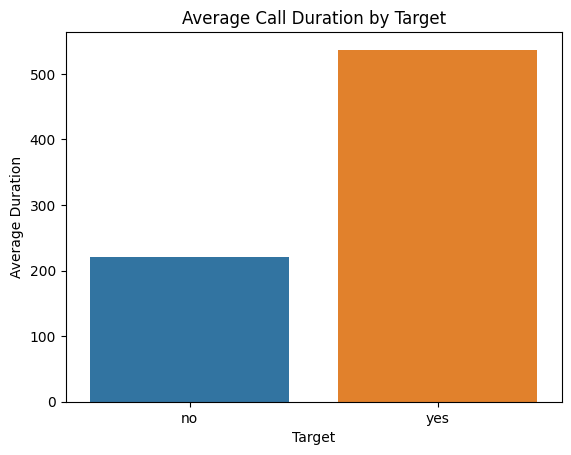

In [ ]:
# targets and average duration of time
# group the dataframe by target and calculate the mean duration for each group
target_duration = df.groupby('Target')['duration'].mean()

# plot the bar chart
sns.barplot(x=target_duration.index, y=target_duration.values)
plt.xlabel('Target')
plt.ylabel('Average Duration')
plt.title('Average Call Duration by Target')
plt.show()

The above graph we plot the between the the Targets and the average duration of the call. This shows that the targets that accept the scheme are having more call duration. This suggests that the tele marketing people should make sure that they spend more time on the call with the clients and play to their interests and enggage them. This would increase the probability of acceptance. 

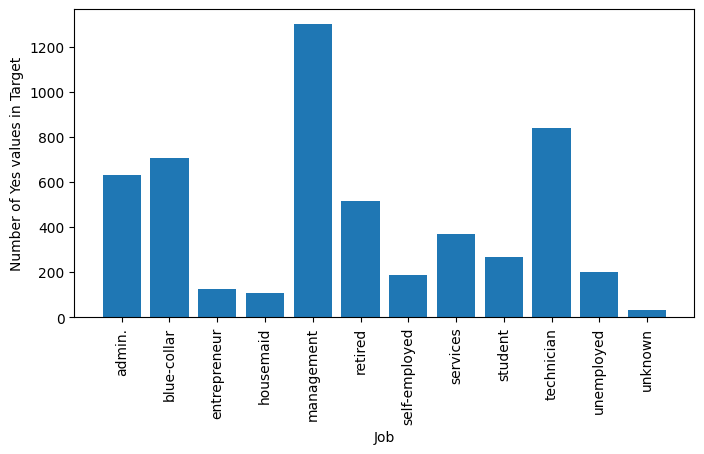

In [ ]:
# total targets in different job roles
df_yes = df[df["Target"] == "yes"]
grouped_data = df_yes.groupby("job")["Target"].count()
plt.figure(figsize=(8, 4))
# Create a bar chart to display the results
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel("Job")
plt.ylabel("Number of Yes values in Target")
plt.show()

The above graph is plotted between average count of Yes in the targets and job category. We can observe that job category management have the highest number of scheme or term perchase and are strong leads. The lowest are the unemployed section. The second higest is technicians and then comes blue collar jobs holders.

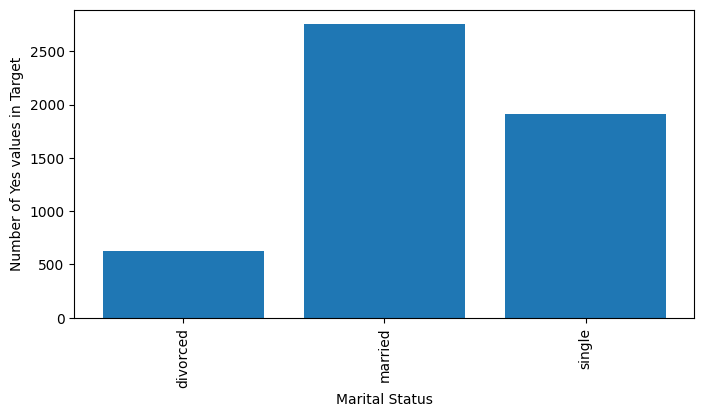

In [ ]:
# total targets in different marital status
df_yes = df[df["Target"] == "yes"]
grouped_data = df_yes.groupby("marital")["Target"].count()
plt.figure(figsize=(8, 4))
# Create a bar chart to display the results
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel("Marital Status")
plt.ylabel("Number of Yes values in Target")
plt.show()

From the above graph we can observe that the married clients accept or purchase the scheme or proposals. 

**Removing outliers**

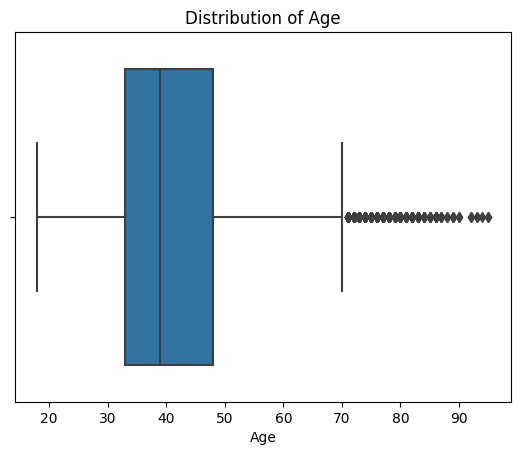

In [ ]:
# create a box plot
sns.boxplot(x='age', data=df)

# set the x-axis label and title
plt.xlabel('Age')
plt.title('Distribution of Age')

# display the plot
plt.show()

We can see that there are outliers in age so we will drop them.

In [ ]:
print("Shape of the original dataframe:", df.shape)

# Remove outliers from 'age'
q1_age = df['age'].quantile(0.25)
q3_age = df['age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_age = q1_age - 1.5 * iqr_age
upper_age = q3_age + 1.5 * iqr_age
df = df[(df['age'] >= lower_age) & (df['age'] <= upper_age)]

# Remove outliers from 'balance'
q1_bal = df['balance'].quantile(0.25)
q3_bal = df['balance'].quantile(0.75)
iqr_bal = q3_bal - q1_bal
lower_bal = q1_bal - 1.5 * iqr_bal
upper_bal = q3_bal + 1.5 * iqr_bal
df = df[(df['balance'] >= lower_bal) & (df['balance'] <= upper_bal)]

print("Shape of the dataframe after removing outliers:", df.shape)

Shape of the original dataframe: (45106, 17)
Shape of the dataframe after removing outliers: (39942, 17)


The outliers in the age column are removed and the dataset size is reduced to 39942 rows and 17 columns

**Lable Encoding Categorical Values**

In [ ]:
# preparing the data for training 

# Converting catagorical attributes to continuous due the feature scaling will be applied later.
# Label encoder order in alphabetical
from sklearn.preprocessing import LabelEncoder


labelencoder_X = LabelEncoder()

df['job']      = labelencoder_X.fit_transform(df['job'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("Job: ",mapping)


df['marital']  = labelencoder_X.fit_transform(df['marital'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("Marital Status: ",mapping)


df['education']= labelencoder_X.fit_transform(df['education'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("Education: ",mapping)


df['default']  = labelencoder_X.fit_transform(df['default'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("default: ",mapping)


df['housing']  = labelencoder_X.fit_transform(df['housing'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("housing: ",mapping)


df['loan']     = labelencoder_X.fit_transform(df['loan'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("loan: ",mapping)


df['poutcome']     = labelencoder_X.fit_transform(df['poutcome'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("poutcome: ",mapping)


df['Target']     = labelencoder_X.fit_transform(df['Target'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("Target: ",mapping)


df['contact']     = labelencoder_X.fit_transform(df['contact'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("contact: ",mapping)


df['month']       = labelencoder_X.fit_transform(df['month'])
# Get the mapping of encoded values to original categorical variables
mapping = dict(zip(range(len(labelencoder_X.classes_)), labelencoder_X.classes_))
print("month: ",mapping)

Job:  {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}
Marital Status:  {0: 'divorced', 1: 'married', 2: 'single'}
Education:  {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}
default:  {0: 'no', 1: 'yes'}
housing:  {0: 'no', 1: 'yes'}
loan:  {0: 'no', 1: 'yes'}
poutcome:  {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}
Target:  {0: 'no', 1: 'yes'}
contact:  {0: 'cellular', 1: 'telephone', 2: 'unknown'}
month:  {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}


I have also recorded the encoded values and classes for future referances.

**Grouping the Ages**

In [ ]:
# encoding age into groups

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df);

Based on age the data is groupd into groups of age less then or equal to 32, between 33 and 47, between 48 and 70, and 71 to 98

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,261.0,1,-1,0,3,0
1,2,9,2,1,0,29,1,0,2,5,8,151.0,1,-1,0,3,0
2,2,2,1,1,0,2,1,1,2,5,8,76.0,1,-1,0,3,0
3,2,1,1,3,0,1506,1,0,2,5,8,92.0,1,-1,0,3,0
4,2,11,2,3,0,1,0,0,2,5,8,198.0,1,-1,0,3,0


**Model Selection and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

1.   **Logistic Regression**




Accuracy: 0.8961028123174497


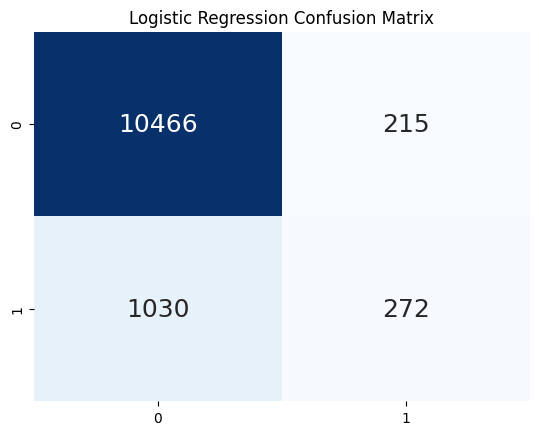

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot()
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
# print(cm)
LR = accuracy_score(y_test, y_pred)
print('Accuracy:', LR)

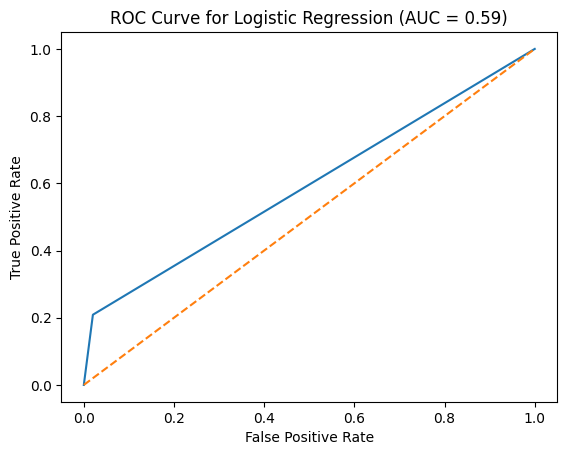

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities and compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (AUC = {:.2f})'.format(auc_score))
plt.show()

2.   **Naive Bayes Classifer**



Accuracy_score: 0.8394392055411833


<Axes: title={'center': 'Naive Bayes Classifer Confusion Matrix'}>

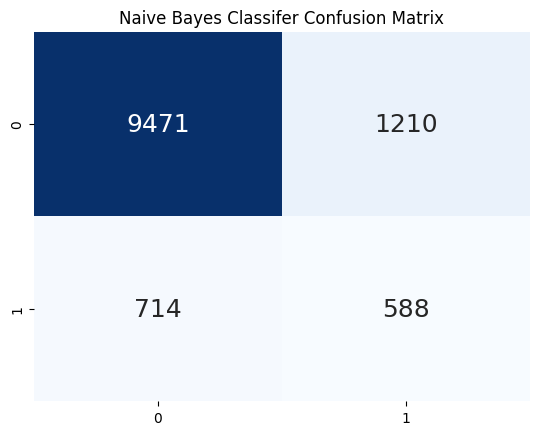

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
NB=accuracy_score(y_test, y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

# Evaluate model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot()
plt.title("Naive Bayes Classifer Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})


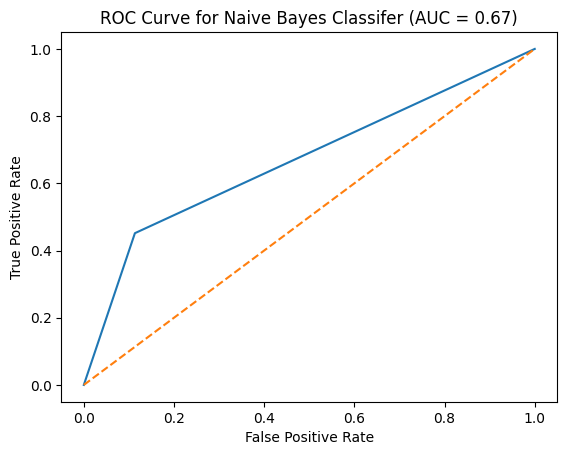

In [ ]:
# Predict probabilities and compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifer (AUC = {:.2f})'.format(auc_score))
plt.show()

**KNN Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

knn_data = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
knn_data.shape

(39942, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_std = pd.DataFrame(StandardScaler().fit_transform(knn_data))
X_std.columns = knn_data.columns

In [ ]:
X = np.array(df.iloc[:,1:16]) 
y = np.array(df['Target'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(27959, 15)
(27959,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Neighbors
neighbors = np.arange(0,25)

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.8620545773178669
0.8915964282733873
0.88408578819995
0.8915964282733873
0.8910122673787866
0.893766168739047
0.8928482016189602
0.895351748310106
0.8946841358591338
0.8965200700993073
0.8966035216556789
0.8964366185429358
0.8966035216556789
0.896770424768422
0.8962697154301927
0.8966035216556789
0.8962697154301927
0.8960193607610782
0.8963531669865643
0.8963531669865643
0.8956021029792206
0.8951013936409914
0.8958524576483351
0.8954351998664775
0.8954351998664775


In [ ]:
myList = list(range(1,30))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 11


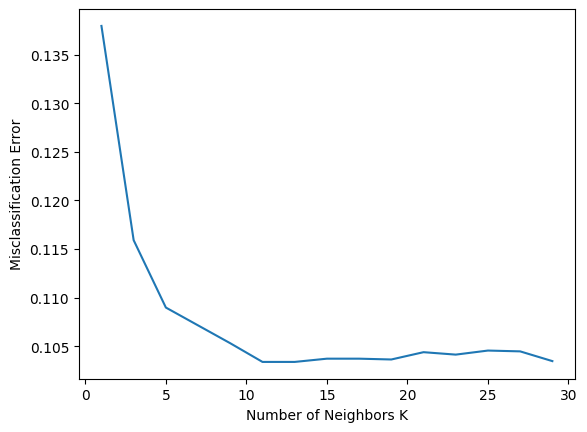

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

From the above elbow curve for the KNN 11 neighbours is the correct choice

Accuracy_score: 0.8966035216556789


<Axes: title={'center': 'KNN Model Confusion Matrix'}>

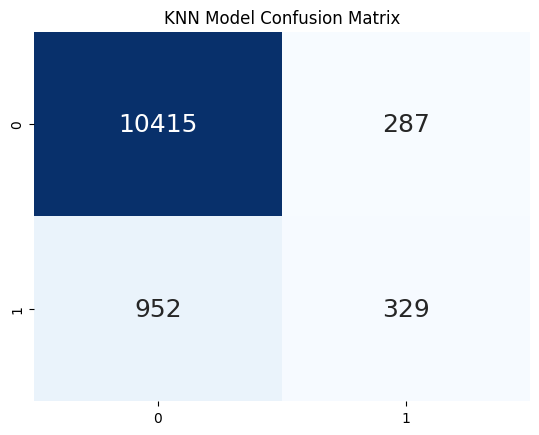

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 11)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
KNN=accuracy_score(y_test, y_pred)   #Accuracy of KNN model
print('Accuracy_score:',KNN) 

# Evaluate model using confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.subplot()
plt.title("KNN Model Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})

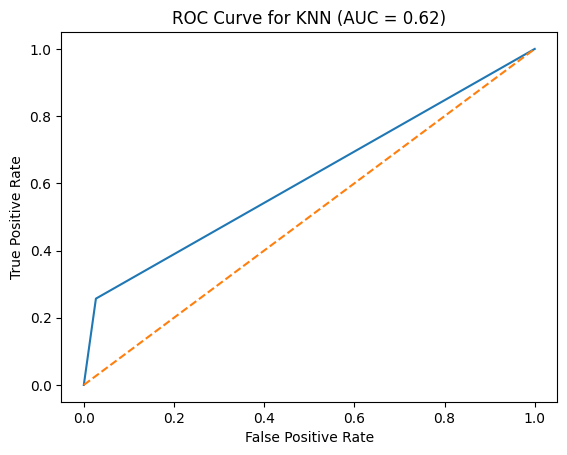

In [ ]:
# Predict probabilities and compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN (AUC = {:.2f})'.format(auc_score))
plt.show()

In [ ]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','K-Near Neighbors','Logistic Model'],
                'Score':  [NB, KNN, LR]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,K-Near Neighbors,0.896604
2,Logistic Model,0.896103
0,Gausian NB,0.839439
